# Litteraturbanken Author 
version 1.12 

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb)
* [T238932 API Litteraturbanken]([https://phabricator.wikimedia.org/T238932)
  * good API documention has not been found
  * GITHUB [spraakbanken/littb-frontend](https://github.com/spraakbanken/littb-frontend)
      Open question how to see [JSON 23](https://github.com/spraakbanken/littb-frontend/issues/23)
  * API [get_authors](https://litteraturbanken.se/api/get_authors)
  * [url_list](https://litteraturbanken.se/api/url_list)
  * [API List all 0-10 include](https://litteraturbanken.se/api/list_all/etext,faksimil,pdf?from=0&to=10&include=authors,forfattare,lbworkid,titlepath,title,librisid,mediatype,main_author.author_id)
    * [List all 0-10](https://litteraturbanken.se/api/list_all/etext,faksimil,pdf?from=0&to=10)
  * Wikidata 
    * property [P5101](https://www.wikidata.org/wiki/Property:P5101)
    * [other properties](https://w.wiki/eck) on the same object as Litterturbanken Author

**The objective** Find all Litteraturbanken Author objects that has Show True and have a WIkidata oibject for that item

**Lesson learned**
1. we need to filter in Show True
  1-1. looks like we need better filter e.g. "[CanthM](https://litteraturbanken.se/f%C3%B6rfattare/CanthM)" has false but has text 
2. in Wikidata we get entries from my earlier load but also Mix-and-Match [katalog 1223](https://mix-n-match.toolforge.org/#/catalog/1223) --> we have also got the form "authorid_norm" that I feel we should not use --> some cleaning
3. we have a big number of Authors not matched to Wikidata abr 790 authors that we should try to match or create new records in Wikidata


## Issues
### 1) Filter out authors with no books 
* BergenstråhleJ miss books 
* BjorklundJA miss books

**solution** Filter on field Show

LitteraturbankenTotShow = LitteraturbankenTot[LitteraturbankenTot["show"]==True]  
### 2) copyright on metadata?
We need CC0 to import data in Wikidata (see [Wikidata:Licensing](https://www.wikidata.org/wiki/Wikidata:Licensing)) e.g. if we should add all books as objects in Wikidata with no text and create links to Litteraturbanken then fields like below need to be [CC-0](https://creativecommons.org/share-your-work/public-domain/cc0/)  
* Författare
* Verk
* Libris-id 
* förlaga	
* eid	
* Införd	
* Länk i klartext	
* Epub	
* Källa

In [1]:
import ipyplot
listOfImageNames = ['LitteraturbankenWD.png']

ipyplot.plot_images(listOfImageNames,img_width=700)

In [2]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-10-01 14:46:13.602733


In [3]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/api/get_authors"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.DataFrame(data["data"])

In [4]:
df.head()

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
0,AarneA,AarneA,"{'date': '1867', 'plain': '1867'}",d4646f71d18e1304e4b16a557dd2f8cf,1600563813743,"{'date': '1925', 'plain': '1925'}",author,Antti Aarne,male,2014-02-11,None,0xbfm5hj2hjvvwn,"Aarne, Antti",None,False,False,Aarne,2019-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AasenE,AasenE,"{'date': '1935', 'plain': '1935'}",f9d8d6666830bbe11a5153518eb5ca7b,1600563813501,NaN,author,Elisabeth Aasen,female,2014-03-13,None,53hlsf1p1mc2mpw,"Aasen, Elisabeth",None,False,True,Aasen,2019-10-16,"{'birthplace': None, 'birthplace_label': None,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbeniusM,AbeniusM,"{'date': '1899', 'plain': '1899'}",3f54cad107a4eabdbe746046f109a593,1600563813504,{'plain': '1970'},author,Margit Abenius,female,2017-04-14,\n<p>MARGIT ABENIUS (1899–1970): ”Margit Abeni...,ljx00mt45v0dfx5,"Abenius, Margit",None,True,True,Abenius,2019-10-16,"{'birthplace': [14.628893758, 61.090146823], '...",1.600608e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AbrahamssonG,AbrahamssonG,"{'date': '1961', 'plain': '1961'}",3d398cb6d33ac0cb9f1f0bc26d6eb9bf,1600563813515,NaN,author,Gunnel Abrahamsson,female,2014-02-11,None,NaN,"Abrahamsson, Gunnel",None,False,False,Abrahamsson,2014-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AbrahamssonS,AbrahamssonS,"{'date': '1872', 'plain': '1872'}",4f3cceeb16912e0524fd79011dafbf7f,1600563813518,"{'date': '1911', 'plain': '1911'}",author,Selma Abrahamsson,female,2018-10-25,None,NaN,"Abrahamsson, Selma",None,False,True,Abrahamsson,2018-10-25,NaN,1.600608e+12,{'intro': ' <p>SELMA ABRAHAMSSON (1872–1911) ...,722.0,"[{'authorid': 'Flavia_pseudonym', 'authorid_no...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#df.info() 
df[df['authorid'].str.contains("SchotteniusM")]

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
2872,SchotteniusM,SchotteniusM,"{'date': '1953', 'plain': '1953'}",02995c6ee296c72d0eb57500429443a7,1600563816296,NaN,author,Maria Schottenius,female,2014-03-17,None,khwz0rc33phfqrp,"Schottenius, Maria",None,False,True,Schottenius,2019-10-16,"{'birthplace': None, 'birthplace_label': None,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
listLittWD = []
for index,row in df.iterrows():
    new_item = dict()
    new_item['authorid'] = row['authorid']
    new_item['authorid_norm'] = row['authorid_norm']
    new_item['show'] = row['show']
    new_item['updated'] = row['updated']
    new_item['imported'] = row['imported']
    new_item['librisid'] = row['librisid']   
    wd = row['wikidata']
    try:            
        new_item['wd'] = wd['wikidata_id']
    except:
        pass
    listLittWD.append(new_item)
LitteraturbankenTot = pd.DataFrame(listLittWD,
                  columns=['authorid','wd','authorid_norm','show','updated','imported','librisid'])
LitteraturbankenTot["updated"] = LitteraturbankenTot["updated"].astype("datetime64")
LitteraturbankenTot["imported"] = LitteraturbankenTot["imported"].astype("datetime64")

LitteraturbankenTot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   authorid       3656 non-null   object        
 1   wd             1418 non-null   object        
 2   authorid_norm  3656 non-null   object        
 3   show           3656 non-null   bool          
 4   updated        2989 non-null   datetime64[ns]
 5   imported       2989 non-null   datetime64[ns]
 6   librisid       1929 non-null   object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 175.1+ KB


In [7]:
LitteraturbankenTot["authorid"].value_counts()

NordströmK     1
AlighieriD     1
HalvorsenJH    1
LinnéCvon      1
JonthM         1
              ..
StobæusK       1
WikIE          1
AntellGW       1
ÅhmanssonG     1
ForsterJGA     1
Name: authorid, Length: 3656, dtype: int64

In [8]:
LitteraturbankenTot["show"].value_counts()

True     2288
False    1368
Name: show, dtype: int64

In [9]:
LitteraturbankenTotShow = LitteraturbankenTot[LitteraturbankenTot["show"]==True] 

LitteraturbankenTotShow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 1 to 3655
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   authorid       2288 non-null   object        
 1   wd             1318 non-null   object        
 2   authorid_norm  2288 non-null   object        
 3   show           2288 non-null   bool          
 4   updated        1837 non-null   datetime64[ns]
 5   imported       1837 non-null   datetime64[ns]
 6   librisid       1212 non-null   object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 127.4+ KB


In [10]:
LitteraturbankenTotShow

,authorid,wd,authorid_norm,show,updated,imported,librisid
1,AasenE,Q11967131,AasenE,True,2019-10-16,2014-03-13,53hlsf1p1mc2mpw
2,AbeniusM,Q4933592,AbeniusM,True,2019-10-16,2017-04-14,ljx00mt45v0dfx5
4,AbrahamssonS,NaN,AbrahamssonS,True,2018-10-25,2018-10-25,NaN
5,AchariusE,Q365923,AchariusE,True,2019-10-16,2018-02-01,dbqtx0hx5srsg85
6,AckeJAG,NaN,AckeJAG,True,2020-09-21,2020-09-21,tr577tpc0k0tfc9
...,...,...,...,...,...,...,...
3644,ÖhmanA,Q6256668,OhmanA,True,NaT,NaT,NaN
3645,OhmanFA,NaN,OhmanFA,True,NaT,NaT,NaN
3647,ÖnnerforsA,NaN,OnnerforsA,True,2020-05-26,2020-05-25,qn246nn82v714bj
3653,ÖstinO,NaN,OstinO,True,NaT,NaT,NaN


In [11]:
# latest updated 
LitteraturbankenTotShow = LitteraturbankenTotShow.sort_values(by=['updated'], ascending=[False])
LitteraturbankenTotShow = LitteraturbankenTotShow.reset_index(drop=True)  

LitteraturbankenTotShow[:20]

,authorid,wd,authorid_norm,show,updated,imported,librisid
0,Eugénie,NaN,Eugenie,True,2022-02-22,2022-02-22,vs6888xd2lx9tfd
1,WägnerE,Q270468,WagnerE,True,2020-09-22,2010-02-17,0xbdgmxj0thr95n
2,JörlinE,NaN,JorlinE,True,2020-09-21,2020-09-21,NaN
3,FechtPM,NaN,FechtPM,True,2020-09-21,2020-09-21,NaN
4,RichardsonJ,NaN,RichardsonJ,True,2020-09-21,2020-09-21,NaN
5,BrattI,NaN,BrattI,True,2020-09-21,2020-09-21,hftwzbq12j7vcjz
6,FrondinE,NaN,FrondinE,True,2020-09-21,2020-09-21,zw9dkwmh3fc7gdr
7,LaurentiusPetriGothus,NaN,LaurentiusPetriGothus,True,2020-09-21,2020-09-21,64jlpf6q2k76524
8,BerglundD,NaN,BerglundD,True,2020-09-21,2020-09-21,NaN
9,HallmanJG,NaN,HallmanJG,True,2020-09-21,2020-09-21,nl024sx63m6jpz4


In [12]:
# latest imported 
LitteraturbankenTotShow = LitteraturbankenTotShow.sort_values(by=['imported'], ascending=[False])
LitteraturbankenTotShow = LitteraturbankenTotShow.reset_index(drop=True)  

LitteraturbankenTotShow[:20]

,authorid,wd,authorid_norm,show,updated,imported,librisid
0,Eugénie,NaN,Eugenie,True,2022-02-22,2022-02-22,vs6888xd2lx9tfd
1,HallmanJG,NaN,HallmanJG,True,2020-09-21,2020-09-21,nl024sx63m6jpz4
2,JohanIII,NaN,JohanIII,True,2020-09-21,2020-09-21,ljx016344bl6mdn
3,WestdahlP,NaN,WestdahlP,True,2020-09-21,2020-09-21,NaN
4,WahlenbergG,NaN,WahlenbergG,True,2020-09-21,2020-09-21,dbqspmqx0z27d0d
5,AckeJAG,NaN,AckeJAG,True,2020-09-21,2020-09-21,tr577tpc0k0tfc9
6,HolthusenCJ,NaN,HolthusenCJ,True,2020-09-21,2020-09-21,NaN
7,TollinF,NaN,TollinF,True,2020-09-21,2020-09-21,53hkn33p1btlh7l
8,BäckströmPO,NaN,BackstromPO,True,2020-09-21,2020-09-21,53hlqskp2qx9r38
9,DahlgrenL,NaN,DahlgrenL,True,2020-09-21,2020-09-21,42gjklkn56sfzxw


In [13]:
df[df['authorid'].str.contains("AbeniusM")]

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
2,AbeniusM,AbeniusM,"{'date': '1899', 'plain': '1899'}",3f54cad107a4eabdbe746046f109a593,1600563813504,{'plain': '1970'},author,Margit Abenius,female,2017-04-14,\n<p>MARGIT ABENIUS (1899–1970): ”Margit Abeni...,ljx00mt45v0dfx5,"Abenius, Margit",None,True,True,Abenius,2019-10-16,"{'birthplace': [14.628893758, 61.090146823], '...",1.600608e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wikidata

In [14]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?authorid WHERE {
?item wdt:P31 wd:Q5.
?item wdt:P5101 ?authorid
} order by ?authorid"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']
    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDLittbanktot = get_sparql_dataframe(endpoint_url, query)


In [15]:
WDLittbanktot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WikidataID  1603 non-null   object
 1   authorid    1603 non-null   object
dtypes: object(2)
memory usage: 25.2+ KB


Duplicates in WD https://w.wiki/eM2
We try to have one if two then set one to preferred rang

In [16]:
WDLittbanktot[WDLittbanktot.duplicated(subset=['WikidataID'])].count()

WikidataID    0
authorid      0
dtype: int64

### Check diff Wikidata <-> Litteraturbanken 

1. **WD_only** --> är oftast att Wikidata har den normerade egenskapen och skall bytas
2. **Litterturbanken_only** skall skapas/matchas i Wikidata
 

In [17]:
dfmerge = pd.merge(WDLittbanktot, LitteraturbankenTotShow,how='outer', on='authorid',indicator=True)

In [18]:
# left_only is propably that we have authorid_norm in WIkidata instead of preferred authorid
# right_only is missing in WD (could be they are part of left_only)
dfmerge["_merge"].value_counts()  

both          1592
right_only     697
left_only       11
Name: _merge, dtype: int64

In [19]:
dfmerge['_merge'] = dfmerge['_merge'].str.replace('left_only','WD_only').str.replace('right_only','Litterturbanken_only')
dfmerge.rename(columns={"_merge": "WD_Litteraturbanken"},inplace = True)
  
#    
dfmerge[0:10]  

,WikidataID,authorid,wd,authorid_norm,show,updated,imported,librisid,WD_Litteraturbanken
0,Q11967131,AasenE,Q11967131,AasenE,True,2019-10-16,2014-03-13,53hlsf1p1mc2mpw,both
1,Q4933592,AbeniusM,Q4933592,AbeniusM,True,2019-10-16,2017-04-14,ljx00mt45v0dfx5,both
2,Q4934135,AbrahamssonS,NaN,AbrahamssonS,True,2018-10-25,2018-10-25,NaN,both
3,Q365923,AchariusE,Q365923,AchariusE,True,2019-10-16,2018-02-01,dbqtx0hx5srsg85,both
4,Q5541979,AckeJAG,NaN,AckeJAG,True,2020-09-21,2020-09-21,tr577tpc0k0tfc9,both
5,Q109244,AdamBremen,Q109244,AdamBremen,True,2019-10-16,2014-02-05,53hkk5vp1k798w1,both
6,Q4933819,AdelborgO,Q4933819,AdelborgO,True,2019-10-16,2008-11-11,sq466t3b4s743md,both
7,Q3338577,AdlerbethGJ,Q3338577,AdlerbethGJ,True,2019-10-16,2010-10-19,wt794lsf0mx0xqp,both
8,Q918652,AdlersparreG,Q918652,AdlersparreG,True,2019-10-16,2015-02-16,86lnqg0s0b2bxhx,both
9,Q4346827,AdlersparreS,Q4346827,AdlersparreS,True,2019-10-16,2014-02-11,64jlfw3q2m71jcx,both


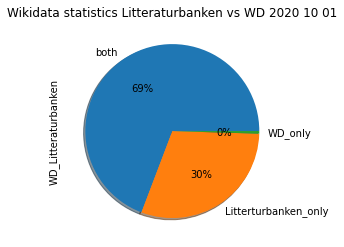

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt   
mergeCheckNumber = dfmerge["WD_Litteraturbanken"].value_counts()  
plotmerge = mergeCheckNumber.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "Wikidata statistics Litteraturbanken vs WD " + start_time.strftime('%Y %m %d'))
plt.savefig('LitteraturbankenWD.png')
plt.show()


In [21]:
mergeCheckNumber

both                    1592
Litterturbanken_only     697
WD_only                   11
Name: WD_Litteraturbanken, dtype: int64

In [22]:
pd.set_option("display.max.rows", None) 
 
wdonly = dfmerge[dfmerge["WD_Litteraturbanken"]=="WD_only"]
# could be items with Show false at Litteraturbanken 
wdonly

,WikidataID,authorid,wd,authorid_norm,show,updated,imported,librisid,WD_Litteraturbanken
99,Q2063496,AstromP,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
107,Q99770777,AxenAE,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
180,Q99770542,BirgisdottirSA,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
183,Q99770648,BjartmarsdottirG,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
272,Q14932468,ButenschönA,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
355,Q99771903,DahlenT,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
695,Q99751230,HornströmM,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
1215,Q16946439,RomanusAlfvenAC,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
1323,Q3527629,SjödinS,NaN,NaN,NaN,NaT,NaT,NaN,WD_only
1456,Q4458078,TirenG,NaN,NaN,NaN,NaT,NaT,NaN,WD_only


In [23]:
df[df['authorid_norm'].str.contains("AstromP")] 

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
3634,ÅströmPa,AstromPa,"{'date': '1955', 'plain': '1955'}",d3e0f19b538efde1c823040441f4fdad,1600563813705,{'plain': '0000'},author,Patrik Åström,male,2017-01-02,None,NaN,"Åström, Patrik",None,True,True,Åström,2017-01-16,"{'birthplace': None, 'birthplace_label': None,...",1.600608e+12,NaN,633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,ÅströmP,AstromP,"{'date': '1929', 'plain': '1929'}",4454dd0c11c3d5e865b5950a542f22ba,1600563813703,{'plain': '2008'},author,Paul Åström,male,2014-02-11,None,NaN,"Åström, Paul",None,True,False,Åström,2014-03-17,"{'birthplace': [17.29833333, 62.39113889], 'bi...",1.600608e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df[df['authorid_norm'].str.contains("RomanusAlfvenAC")] 

,authorid,authorid_norm,birth,db_checksum,db_timestamp,death,doc_type,full_name,gender,imported,intro,librisid,name_for_index,pictureinfo,searchable,show,surname,updated,wikidata,db_timestamp_updated,dramawebben,popularity,pseudonym,sources,other_name,intro_author,intro_author_norm,picture,bibliography,external_ref,presentation,seemore
2716,RomanusAlfvénAC,RomanusAlfvenAC,"{'date': '1874', 'plain': '1874'}",111c2a2d1dc80ca70c25df609873b759,1600563816138,"{'date': '1947', 'plain': '1947'}",author,Anna-Clara Romanus-Alfvén,female,NaN,None,NaN,"Romanus-Alfvén, Anna-Clara",None,False,False,Romanus-Alfvén,NaN,"{'birthplace': None, 'birthplace_label': None,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. merge wdonly authorid on authorid_norm --> we get the authorid that we should use 
1. next step is create Quickstatement  for delete and upload the new one see example [Calc](https://docs.google.com/spreadsheets/d/1lw1wqTmFndxlltJHhyEyzQxoGTph6J2tdVCwgmJFHdI/edit?usp=sharing)


In [25]:
wdonlymerge = pd.merge(wdonly, LitteraturbankenTotShow, left_on='authorid',right_on='authorid_norm')
wdonlymerge[{'WikidataID','authorid_x','authorid_y','show_y'}] 


,WikidataID,authorid_x,show_y,authorid_y
0,Q99770777,AxenAE,True,AxénAE
1,Q99770542,BirgisdottirSA,True,BirgisdóttirSA
2,Q99770648,BjartmarsdottirG,True,BjartmarsdóttirG
3,Q99771903,DahlenT,True,DahlénT


In [26]:
wddelete = wdonly = dfmerge[dfmerge["WD_Litteraturbanken"]=="both"]  
wddelete.head()

,WikidataID,authorid,wd,authorid_norm,show,updated,imported,librisid,WD_Litteraturbanken
0,Q11967131,AasenE,Q11967131,AasenE,True,2019-10-16,2014-03-13,53hlsf1p1mc2mpw,both
1,Q4933592,AbeniusM,Q4933592,AbeniusM,True,2019-10-16,2017-04-14,ljx00mt45v0dfx5,both
2,Q4934135,AbrahamssonS,NaN,AbrahamssonS,True,2018-10-25,2018-10-25,NaN,both
3,Q365923,AchariusE,Q365923,AchariusE,True,2019-10-16,2018-02-01,dbqtx0hx5srsg85,both
4,Q5541979,AckeJAG,NaN,AckeJAG,True,2020-09-21,2020-09-21,tr577tpc0k0tfc9,both


In [27]:
dfmerge_authorid_norm = pd.merge(wdonly, LitteraturbankenTotShow, left_on='authorid', right_on='authorid_norm',indicator=True)

In [28]:
dfmerge_authorid_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   WikidataID           1302 non-null   object        
 1   authorid_x           1302 non-null   object        
 2   wd_x                 1075 non-null   object        
 3   authorid_norm_x      1302 non-null   object        
 4   show_x               1302 non-null   object        
 5   updated_x            1169 non-null   datetime64[ns]
 6   imported_x           1169 non-null   datetime64[ns]
 7   librisid_x           941 non-null    object        
 8   WD_Litteraturbanken  1302 non-null   object        
 9   authorid_y           1302 non-null   object        
 10  wd_y                 1075 non-null   object        
 11  authorid_norm_y      1302 non-null   object        
 12  show_y               1302 non-null   bool          
 13  updated_y            1169 non-nul

In [29]:
dfmerge_authorid_norm.head()

,WikidataID,authorid_x,wd_x,authorid_norm_x,show_x,updated_x,imported_x,librisid_x,WD_Litteraturbanken,authorid_y,wd_y,authorid_norm_y,show_y,updated_y,imported_y,librisid_y,_merge
0,Q11967131,AasenE,Q11967131,AasenE,True,2019-10-16,2014-03-13,53hlsf1p1mc2mpw,both,AasenE,Q11967131,AasenE,True,2019-10-16,2014-03-13,53hlsf1p1mc2mpw,both
1,Q4933592,AbeniusM,Q4933592,AbeniusM,True,2019-10-16,2017-04-14,ljx00mt45v0dfx5,both,AbeniusM,Q4933592,AbeniusM,True,2019-10-16,2017-04-14,ljx00mt45v0dfx5,both
2,Q4934135,AbrahamssonS,NaN,AbrahamssonS,True,2018-10-25,2018-10-25,NaN,both,AbrahamssonS,NaN,AbrahamssonS,True,2018-10-25,2018-10-25,NaN,both
3,Q365923,AchariusE,Q365923,AchariusE,True,2019-10-16,2018-02-01,dbqtx0hx5srsg85,both,AchariusE,Q365923,AchariusE,True,2019-10-16,2018-02-01,dbqtx0hx5srsg85,both
4,Q5541979,AckeJAG,NaN,AckeJAG,True,2020-09-21,2020-09-21,tr577tpc0k0tfc9,both,AckeJAG,NaN,AckeJAG,True,2020-09-21,2020-09-21,tr577tpc0k0tfc9,both


In [30]:
#dfmerge_authorid_norm[{'WikidataID','authorid_x','authorid_y'}] 

### check items not matched to Wikidata

In [31]:
dfmerge["WD_Litteraturbanken"].value_counts()  

both                    1592
Litterturbanken_only     697
WD_only                   11
Name: WD_Litteraturbanken, dtype: int64

In [32]:
Litterturbanken_only = dfmerge[dfmerge["WD_Litteraturbanken"]=="Litterturbanken_only"]  
Litterturbanken_only.info()
Litterturbanken_only.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 1603 to 2299
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   WikidataID           0 non-null      object        
 1   authorid             697 non-null    object        
 2   wd                   8 non-null      object        
 3   authorid_norm        697 non-null    object        
 4   show                 697 non-null    object        
 5   updated              407 non-null    datetime64[ns]
 6   imported             407 non-null    datetime64[ns]
 7   librisid             63 non-null     object        
 8   WD_Litteraturbanken  697 non-null    object        
dtypes: datetime64[ns](2), object(7)
memory usage: 54.5+ KB


,WikidataID,authorid,wd,authorid_norm,show,updated,imported,librisid,WD_Litteraturbanken
1603,NaN,Eugénie,NaN,Eugenie,True,2022-02-22,2022-02-22,vs6888xd2lx9tfd,Litterturbanken_only
1604,NaN,HallmanJG,NaN,HallmanJG,True,2020-09-21,2020-09-21,nl024sx63m6jpz4,Litterturbanken_only
1605,NaN,WestdahlP,NaN,WestdahlP,True,2020-09-21,2020-09-21,NaN,Litterturbanken_only
1606,NaN,HolthusenCJ,NaN,HolthusenCJ,True,2020-09-21,2020-09-21,NaN,Litterturbanken_only
1607,NaN,BäckströmPO,NaN,BackstromPO,True,2020-09-21,2020-09-21,53hlqskp2qx9r38,Litterturbanken_only
1608,NaN,BerglundD,NaN,BerglundD,True,2020-09-21,2020-09-21,NaN,Litterturbanken_only
1609,NaN,FechtPM,NaN,FechtPM,True,2020-09-21,2020-09-21,NaN,Litterturbanken_only
1610,NaN,StaaffCT,NaN,StaaffCT,True,2020-08-24,2020-08-24,86lpsv3s08ds2hw,Litterturbanken_only
1611,NaN,LöfgrenE,NaN,LofgrenE,True,2020-08-24,2020-08-24,NaN,Litterturbanken_only
1612,NaN,AtterbomSvensonH,NaN,AtterbomSvensonH,True,2020-08-24,2020-08-24,NaN,Litterturbanken_only


### Find objects with Show false at Litteraturbanken 
If found in Wikidata they are candidates to be deleted in Wikidata

In [33]:
LitteraturbankenTotNotShow = LitteraturbankenTot[LitteraturbankenTot["show"]==False]  
dfmergeDelete = pd.merge(WDLittbanktot, LitteraturbankenTotNotShow,how='outer', on='authorid',indicator=True)

In [34]:
# both are candidates to be deleted as they have show False
dfmergeDelete["_merge"].value_counts()  

left_only     1601
right_only    1366
both             2
Name: _merge, dtype: int64

In [38]:
#Coukld be canidate to be deleted in WD not sure
dfmergeDeleteBoth = dfmergeDelete[dfmergeDelete["_merge"]=="both"]  
dfmergeDeleteBoth

,WikidataID,authorid,wd,authorid_norm,show,updated,imported,librisid,_merge
272,Q14932468,ButenschönA,Q14932468,ButenschonA,False,2018-10-25,2018-10-25,NaN,both
1323,Q3527629,SjödinS,Q3527629,SjodinS,False,2019-10-16,2010-09-28,1zcfhwvk50wff8f,both


In [35]:
dfmergeDelete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2968
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   WikidataID     1603 non-null   object        
 1   authorid       2969 non-null   object        
 2   wd             100 non-null    object        
 3   authorid_norm  1368 non-null   object        
 4   show           1368 non-null   object        
 5   updated        1152 non-null   datetime64[ns]
 6   imported       1152 non-null   datetime64[ns]
 7   librisid       717 non-null    object        
 8   _merge         2969 non-null   category      
dtypes: category(1), datetime64[ns](2), object(6)
memory usage: 211.8+ KB


In [36]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-10-01 14:46:18.809665
Time elapsed (hh:mm:ss.ms) 0:00:05.207076
